## **Imports:**

In [ ]:
import Bio
from Bio.Seq import Seq
from Bio import SeqIO, Entrez
from Bio.SeqRecord import SeqRecord
import numpy as np
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import Bio.Data.CodonTable as CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import random
import matplotlib.pyplot as plt
import plotly.express as px

colab = False

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
# Set the path of the folder where the datasets exist
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')
    folder_path = '/content/drive/MyDrive/Ubiquitous Genomics/'
else:
    folder_path = 'data/'
    

Mounted at /content/drive/


## **Question 1:**

In [ ]:
def translate_mRNA(m_rna, stop=True):
  result = []
  if stop:
    start_idx = m_rna.find("AUG")
    print("The initiation codon position: " + str(start_idx))
    translated = m_rna[start_idx:].translate(to_stop=stop)
    stop_idx = start_idx + 3 * len(translated)
    print("The stop codon position: " + str(stop_idx))
    stop_codon = m_rna[stop_idx:stop_idx+3]
    print("The stop codon: " + stop_codon)
    result.append(translated)
  else:
    temp = m_rna
    while "AUG" in temp:
      start_idx = temp.find("AUG")
      translated = temp[start_idx:].translate(to_stop=True)
      stop_idx = start_idx + 3 * len(translated)
      temp = temp[stop_idx:]
      result.append(translated)


  return result

The function takes an mRNA sequence as an input, as well as a stop condition. If the condition is true, it will return only the first protien in the sequence.

## **Question 2:**





2.1 Initiation codon position:


*   Pfizer : 54
*   Moderna : 57

2.2 Termination codon position:


*   Pfizer : 3873
*   Moderna : 3876

2.3 Both companies used "UGA" as termination codon.

2.4 Another possible termination codons will be : "UAG" or "UAA".

2.5 The area between the first nucleotide and the "AUG" is called 5'UTR.

2.6 The area between the termination codon and the last nucleotide is called 3'UTR.


In [ ]:
records = list(SeqIO.parse(f"{folder_path}mRNA design of the Pfizer and Moderna vaccines.fasta", "fasta"))
pfizer_record = records[0]
moderna_record = records[1]

In [ ]:
pfizer_record.seq.transcribe()

Seq('GAGAAUAAACUAGUAUUCUUCUGGUCCCCACAGACUCAGAGAGAACCCGCCACC...GCA')

In [ ]:
print("Name: " + pfizer_record.name)
trans_pfizer = translate_mRNA(pfizer_record.seq.transcribe())[0]
print(trans_pfizer)
print()

Name: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
The initiation codon position: 54
The stop codon position: 3873
The stop codon: UGA
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFN

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
print("Name: " + moderna_record.name)
trans_moderna = translate_mRNA(moderna_record.seq.transcribe())[0]
print(trans_moderna)
print()

Name: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
The initiation codon position: 57
The stop codon position: 3876
The stop codon: UGA
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAG

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


## **Question 3:**

The length of the translated sequence:


*   Pfizer: 1273
*   Moderna: 1273

The coding sequences have the same length.



In [ ]:
length_pfizer = len(trans_pfizer)
print("The Pfizer coding length: " + str(length_pfizer))

length_moderna = len(trans_moderna)
print("The Moderna coding length: " + str(length_moderna))

The Pfizer coding length: 1273
The Moderna coding length: 1273


## **Question 4**:

Yes, the vaccines are identical in the protein level.

In [ ]:
is_same_protein = trans_moderna == trans_pfizer
print(is_same_protein)

True


## **Question 5**:

No, the vaccines are not identical in the nucleotide level.

In [ ]:
is_same_nucleotide = pfizer_record.seq == moderna_record.seq
print(is_same_nucleotide)

False


## **Question 6:**

Create a histogram of amino-acids usage for the Pfizer vaccine.

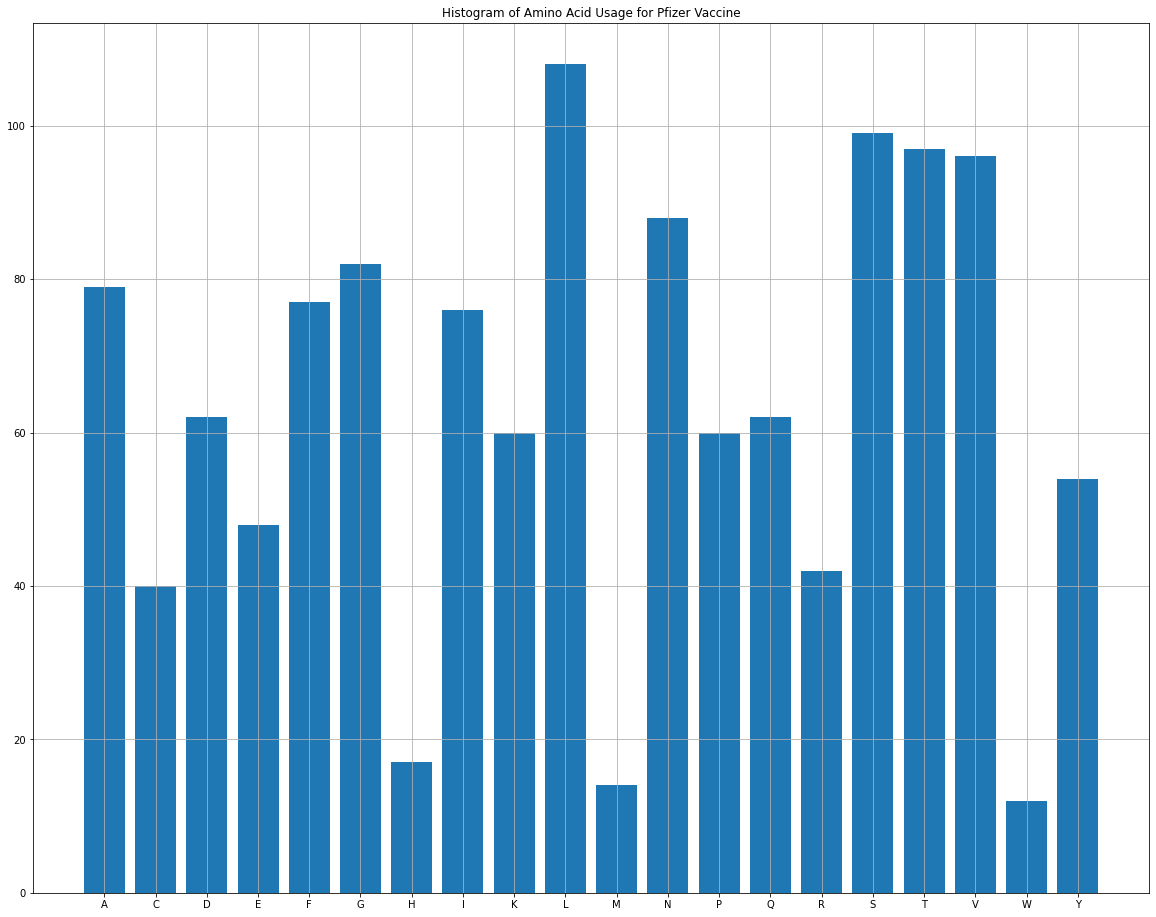

In [ ]:
pfizer_amino_analysis = ProteinAnalysis(str(trans_pfizer))
amino_count = pfizer_amino_analysis.count_amino_acids()
plt.figure(figsize=(20,16))
plt.grid()
plt.bar(amino_count.keys(), amino_count.values())
plt.title('Histogram of Amino Acid Usage for Pfizer Vaccine');

## **Question 7:**

Create the same histogram but color each codon within the amino-acid (i.e. create a stacked histogram)

In [ ]:
pfizer_seq = records[0].seq # untranslated DNA sequence of pfizer vaccine

def coding_region(seq):  #function to get the coding region of pfizer vaccine sequence
    start = 'ATG'
    stop = ['TAG','TAA','TGA']

    start_index = seq.find(start)+3
    include = np.arange(start_index, len(seq), 3)
    
    for i in include:
        codon = seq[i : i+3]
        if codon in stop:
            stop_index = i
            break           
    return seq[start_index:stop_index]

In [ ]:
def codon_frequency(coding_seq):  # parse the coding sequence by codons and count the number of each codon
    list(coding_seq)
    codon_list = []
    for i in range(0,len(coding_seq),3):
      codon_list.append(coding_seq[i:i+3]) 
      codon_counts = Counter(codon_list)
    return codon_counts   # return a codon dictionary with keys as codons and values as the number fo each codon


def map_codon_dict_to_codon_table (codon_dictionary):  # merge pfizer codon frequency dictionary with BioPython codon table
    table = CodonTable.standard_dna_table.forward_table  
    protein_dict = {}
    for i in range(len(codon_dictionary)):
        keys = protein_dict.keys()
        temp_protein = table[str(list(codon_dictionary.keys())[i])]
        if temp_protein in keys:
            protein_dict[temp_protein][str(list(codon_dictionary.keys())[i])] = list(codon_dictionary.values())[i]
        else:
            protein_dict[temp_protein] = {str(list(codon_dictionary.keys())[i]) : list(codon_dictionary.values())[i]}
    return protein_dict  # return final dictionary with keys as single letter protein and values as its respective codons and frequency counts from the pfizer vaccine seq


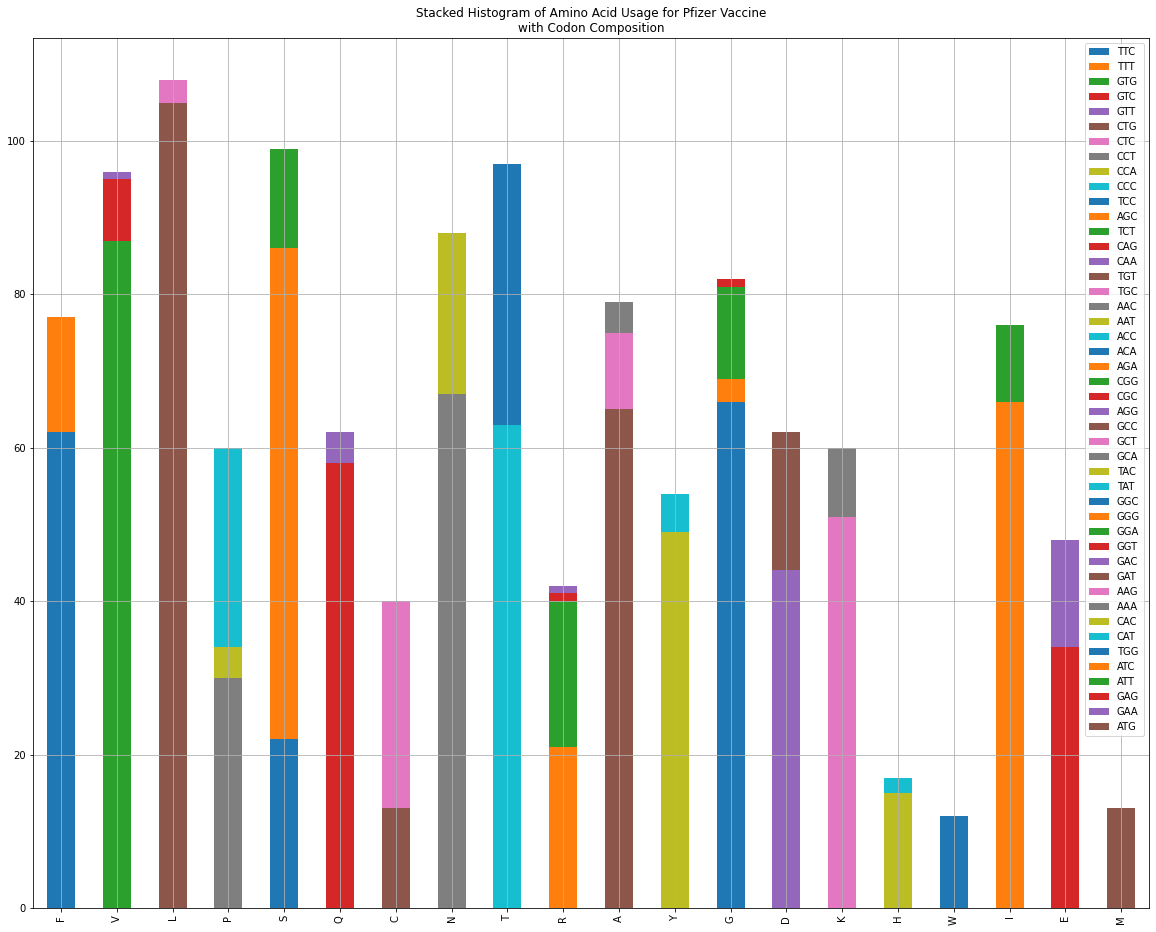

In [ ]:
#call functions
pfizer_sequence = coding_region(pfizer_seq)
pfizer_codon_dict = codon_frequency(pfizer_sequence)
protein_dict = map_codon_dict_to_codon_table(pfizer_codon_dict)

#plot
df = pd.DataFrame(protein_dict)
df = df.transpose()
df.plot(kind="bar", stacked=True, grid=True,  figsize=(20,16))
plt.title('Stacked Histogram of Amino Acid Usage for Pfizer Vaccine\nwith Codon Composition')
plt.show()

## **Question 8:**

The length of the Wuhan strain genome is 29,903.

In [ ]:
wuhan_record = list(SeqIO.parse(f"{folder_path}/wuhan.fasta", "fasta"))[0]

In [ ]:
print(f'The length of the Wuhan strain genome is {len(wuhan_record)}.')

The length of the Wuhan strain genome is 29903.


## **Question 9:**

The nucleotide sequence of the Spike region of the Wuhan strain (start and end position were taken from [NCBI](https://www.ncbi.nlm.nih.gov/nuccore/1798174254)) is:

```ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAA```

In [ ]:
WUHAN_SPIKE_START = 21562
WUHAN_SPIKE_END = 25384

wuhan_spike = wuhan_record[WUHAN_SPIKE_START:WUHAN_SPIKE_END].seq
print(f'The nucleotide sequence of the Spike region of the Wuhan strain is:\n{str(wuhan_spike)}')

The nucleotide sequence of the Spike region of the Wuhan strain is:
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGG

## **Question 10:**

#### GC Percentages
* Wuhan:  37.973%
* Pfizer:	56.838%

The GC-content of the Pfizer Spike is significantly higher than the Wuhan one. We believe that this is in order to make the conversion to proteins more efficient.

References:
* [GC-content - Wikipedia](https://en.wikipedia.org/wiki/GC-content)
* [Reverse Engineering the source code of the BioNTech/Pfizer SARS-CoV-2 Vaccine](https://berthub.eu/articles/posts/reverse-engineering-source-code-of-the-biontech-pfizer-vaccine/)
* [High Guanine and Cytosine Content Increases mRNA Levels in Mammalian Cells - PMC](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1463026/)

In [ ]:
from Bio.SeqUtils import GC

In [ ]:
print(
    f'GC Percentages\n'
    f'==============\n'
    f'Wuhan\t{GC(wuhan_record.seq)}\n'
    f'Pfizer\t{GC(pfizer_record.seq)}'
)

GC Percentages
Wuhan	37.97277865097148
Pfizer	56.83832335329341


## **Question 11:**

Wuhan's protein's sequence is:

```MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT```

In [ ]:
wuhan_amino = wuhan_spike.transcribe().translate(to_stop=True)
print(wuhan_amino)

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGR

## **Question 12:**

The Spike region of the Pfizer vaccine and the Spike of the Wuhan strain differ in only two positions in the **protein** level:
* Position 985: Pfizer: P, Wuhan: K
* Position 986: Pfizer: P, Wuhan: V

While there were many variants of tested vaccines were able to induce neutralizing antibodies, only the antigen with both a deleted cleavage site and the K986P and V987P (PP) mutations completely protected from challenge in this mouse model.

References:
* [Introduction of Two Prolines and Removal of the Polybasic Cleavage Site Lead to Higher Efficacy of a Recombinant Spike-Based SARS-CoV-2 Vaccine in the Mouse Model | mBio](https://journals.asm.org/doi/10.1128/mBio.02648-20)
* [BNT162b vaccines protect rhesus macaques from SARS-CoV-2 | Nature](https://www.nature.com/articles/s41586-021-03275-y)


In [ ]:
wuhan_amino_string = str(wuhan_amino)
pfizer_amino_string = str(trans_pfizer)
for index, char in enumerate(pfizer_amino_string):
  if char != wuhan_amino_string[index]:
    print(f'Found difference in index {index} (Pfizer: {char}, Wuhan: {wuhan_amino_string[index]})')

Found difference in index 985 (Pfizer: P, Wuhan: K)
Found difference in index 986 (Pfizer: P, Wuhan: V)


## **Question 13:**

In [ ]:
PFIZER_SPIKE_START = 54
PFIZER_SPIKE_END = 3873

# Split the Wuhan Spike into codons (excluding the STOP codon)
wuhan_spike_transcribed = wuhan_spike.transcribe()
start_codon_index = wuhan_spike_transcribed.find('AUG')
wuhan_codons = [str(wuhan_spike_transcribed[i:i+3]) for i in range(start_codon_index, len(wuhan_spike_transcribed), 3)]
wuhan_codons = wuhan_codons[:len(wuhan_codons) - 1]

# Split the Pfizer Spike into codons (excluding the STOP codon)
pfizer_record_transcribed = pfizer_record.seq.transcribe()[PFIZER_SPIKE_START:PFIZER_SPIKE_END]
start_codon_index = pfizer_record_transcribed.find('AUG')
pfizer_codons = [str(pfizer_record_transcribed[i:i+3]) for i in range(start_codon_index, len(pfizer_record_transcribed), 3)]

# Create codon mapping
wuhan_pfizer_codon_mapping = {}
for index, codon in enumerate(wuhan_codons):
  if CodonTable.standard_rna_table.forward_table[codon] != CodonTable.standard_rna_table.forward_table[pfizer_codons[index]]:
    P_pfizer_codon = pfizer_codons[index]
    continue

  if codon not in wuhan_pfizer_codon_mapping:
    wuhan_pfizer_codon_mapping[codon] = set()

  wuhan_pfizer_codon_mapping[codon].add(pfizer_codons[index])

In [ ]:
wuhan_pfizer_codon_mapping

{'AAA': {'AAA', 'AAG'},
 'AAC': {'AAC', 'AAU'},
 'AAG': {'AAA', 'AAG'},
 'AAU': {'AAC', 'AAU'},
 'ACA': {'ACA', 'ACC'},
 'ACC': {'ACA', 'ACC'},
 'ACG': {'ACC'},
 'ACU': {'ACA', 'ACC'},
 'AGA': {'AGA', 'AGG', 'CGG'},
 'AGC': {'AGC', 'UCC'},
 'AGG': {'AGA', 'CGC', 'CGG'},
 'AGU': {'AGC', 'UCU'},
 'AUA': {'AUC', 'AUU'},
 'AUC': {'AUC', 'AUU'},
 'AUG': {'AUG'},
 'AUU': {'AUC', 'AUU'},
 'CAA': {'CAA', 'CAG'},
 'CAC': {'CAC', 'CAU'},
 'CAG': {'CAG'},
 'CAU': {'CAC', 'CAU'},
 'CCA': {'CCC', 'CCU'},
 'CCC': {'CCC', 'CCU'},
 'CCU': {'CCA', 'CCC', 'CCU'},
 'CGC': {'CGG'},
 'CGG': {'AGA', 'CGG'},
 'CGU': {'AGA', 'CGG'},
 'CUA': {'CUG'},
 'CUC': {'CUG'},
 'CUG': {'CUG'},
 'CUU': {'CUG'},
 'GAA': {'GAA', 'GAG'},
 'GAC': {'GAC', 'GAU'},
 'GAG': {'GAA', 'GAG'},
 'GAU': {'GAC', 'GAU'},
 'GCA': {'GCA', 'GCC', 'GCU'},
 'GCC': {'GCC', 'GCU'},
 'GCG': {'GCC'},
 'GCU': {'GCA', 'GCC', 'GCU'},
 'GGA': {'GGA', 'GGC', 'GGG'},
 'GGC': {'GGA', 'GGC'},
 'GGG': {'GGA', 'GGC'},
 'GGU': {'GGA', 'GGC', 'GGG', 'GGU'},

## **Question 14:**

We can learn that when possible, Pfizer chose to use codons that will help maximizing the GC-content (for the sake of better protein conversion efficiency, as explained in question 10).

For example, the `UUG` codon which codes Leucine, was replaced with `CUC` and `CUG` by Pfizer, each contributing an extra `G` or `C` to the GC count.

## **Question 15-16-17:**

[spike protein length](https://www.news-medical.net/health/What-are-Spike-Proteins.aspx)

In [ ]:
# Get ba2 records
ba2_records = list(SeqIO.parse(f"{folder_path}full_ba2_sequences.fasta", "fasta"))
ba1_records = list(SeqIO.parse(f"{folder_path}ba1_sequences.fasta", "fasta"))

In [ ]:
# Functions that finds the spike protien in the translated mRNA sequence
def find_spike(seqs_ba2, seq_wuhan):
    best_score = 0
    idx = 0
    best_idx = 0 
    
    protiens = translate_mRNA(seqs_ba2, stop=False)
    
    for seq in protiens:
        score = pairwise2.align.globalxx(seq, seq_wuhan, score_only=True)
        if score>best_score:
            best_score=score
            best_idx=idx
        idx += 1

    return protiens[best_idx]

In [ ]:
# Extracts spikes from a random 500 sequences
spikes = []
ba2_reqs = random.choices(ba2_records, k=500)
i = len(ba2_reqs)
for req in ba2_reqs:
    req_rna = req.seq.transcribe()
    spike = find_spike(req_rna, wuhan_amino)
    spikes.append(spike)
    i -= 1

In [ ]:
# Build dataframe for spike analysis
spikes_list = []
for seq in spikes:
    spikes_list.append(list(seq))
df_spikes = pd.DataFrame(spikes_list)
df_counts = df_spikes.apply(pd.value_counts).transpose()

In [ ]:
# Visualuze amino-acid distribution per spike protien index
fig = px.bar(df_counts, title='Amino Acid Distribution per Spike protien index')
fig.show()

In [ ]:
# Find most common spike protien
spike_counter = Counter(spikes)
most_common_spike = spike_counter.most_common(1)[0][0]

In [ ]:
# Print most common spike sequence
print(most_common_spike)

MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLGRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNFAPFFAFKCYGVSPTKLNDLCFTNVYADSFVIRGNEVSQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNKLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGNKPCNGVAGFNCYFPLRSYGFRPTYGVGHQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTKSHRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLKRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKYFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNHNAQALNTLVKQLSSKFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQS

In [ ]:
# Determine where to do the K->P V->P conversion based one Pfizer
print(most_common_spike[980:990])
print(wuhan_amino[980:990])

LDKVEAEVQI
LSRLDKVEAE


We compare the area that the Wuhan spike protien had the 'KV' protiens that were changed in the Pfizer vaccine to the location in BA2:

BA2 spike index location 980->LD**KV**EAEVQI->989. Location is index 982, 983

Wuhan spike index location 980->LSRLD**KV**EAE->989. Location is index 985, 986.

Thus, we will change the protiens in index 982-983 from KV to PP

In [ ]:
# Change indexs
PP_index_1 = 982
PP_index_2 = 983

BA2_S_protien = most_common_spike[:PP_index_1]+'PP'+most_common_spike[PP_index_2+1:]
BA2_S_protien[980:990]

Seq('LDPPEAEVQI')

In [ ]:
# Find index in mRNA codon
for i in range(0,len(spikes)):
  if spikes[i]==most_common_spike: # Shows that we can use the first spike from the first ba2_reqs to identify the location
    break

wuhan_start_part_for_search = wuhan_spike_transcribed[0:40] # Assuming that the first 40 codons in the Wuhan spike are identical to that of the BA2

ba2_start_index = ba2_reqs[i].seq.transcribe().find(wuhan_start_part_for_search)
ba2_stop_index = ba2_start_index + 3*len(BA2_S_protien)

BA2_S_mRNA = ba2_reqs[i].seq.transcribe()[ba2_start_index:ba2_stop_index+1]

In [ ]:
# Create mRNA part for the spike protien based on Pfizer lookup table
UBI_GROUP_BA2_mRNA = []
for i in range(0, len(BA2_S_mRNA), 3):
  temp_seq = str(BA2_S_mRNA[i:i+3])
  if temp_seq in wuhan_pfizer_codon_mapping:
    options = wuhan_pfizer_codon_mapping[temp_seq]
    UBI_GROUP_BA2_mRNA.append(random.sample(options,1)[0])
  else:
    UBI_GROUP_BA2_mRNA.append(temp_seq)

UBI_GROUP_BA2_mRNA = ''.join(UBI_GROUP_BA2_mRNA)
UBI_GROUP_BA2_mRNA


'AUGUUUGUCUUCCUGGUGCUGCUGCCUCUGGUCUCCAGCCAGUGCGUCAAUCUGAUCACCCGGACACAAUCCUACACCAAUUCCUUCACACGGGGUGUCUAUUACCCUGAUAAGGUCUUCAGAAGCAGCGUGCUCCAUUCCACACAGGACCUGUUCCUCCCCUUCUUUUCCAAUGUCACCUGGUUUCACGCAAUCCACGUCAGCGGAACCAACGGCACCAAAAGAUUCGACAACCCUGUUCUGCCUUUUAAUGAUGGUGUCUAUUUUGCUUCCACAGAGAAGUCUAACAUCAUCAGAGGAUGGAUUUUCGGCACCACCCUCGACAGCAAAACACAGUCCCUGCUGAUUGUGAACAACGCUACCAACGUCGUCAUCAAGGUGUGUGAGUUCCAGUUCUGCAAUGAUCCCUUUCUCGACGUGUAUUACCAUAAGAACAAUAAAAGCUGGAUGGAAUCUGAAUUCAGAGUCUAUUCUUCUGCCAAUAACUGUACCUUUGAGUAUGUUUCUCAGCCCUUCCUGAUGGAUCUGGAAGGGAAGCAGGGAAAUUUUAAGAAUCUGAGAGAAUUUGUCUUCAAAAAUAUCGAUGGGUAUUUCAAGAUUUAUUCCAAACACACCCCCAUUAACCUGGGACGGGAUCUGCCACAGGGUUUCUCUGCUCUCGAGCCCCUCGUGGAUCUGCCUAUCGGCAUCAAUAUUACCCGCUUUCAGACCCUGCUGGCCCUCCAUAGGAGCUAUCUGACACCAGGUGAUUCUAGCAGCGGUUGGACAGCCGGUGCCGCCGCAUAUUAUGUCGGAUACCUGCAACCACGCACAUUCCUGCUCAAAUAUAAUGAAAACGGAACAAUCACAGACGCCGUGGAUUGCGCACUGGAUCCACUGUCUGAGACCAAAUGUACCCUGAAAAGCUUCACAGUGGAAAAGGGCAUCUACCAGACCUCUAACUUUAGAGUCCAACCUACCGAGUCCAUCGUCAGGUUUCCAAAUAUUACAAACCUCUGU

In [ ]:
# Change KV -> PP in mRNA
UBI_GROUP_BA2_mRNA = UBI_GROUP_BA2_mRNA[:3+3*PP_index_1] + P_pfizer_codon + P_pfizer_codon + UBI_GROUP_BA2_mRNA[3+3*(PP_index_2+1):]

In [ ]:
# Add 5'UTR and 3'UTR
UBI_GROUP_mRNA_start = pfizer_record.seq.transcribe()[:PFIZER_SPIKE_START]
UBI_GROUP_mRNA_end = pfizer_record.seq.transcribe()[PFIZER_SPIKE_END+1:]

UBI_GROUP_BA2_VACCINE = UBI_GROUP_mRNA_start + UBI_GROUP_BA2_mRNA + UBI_GROUP_mRNA_end

In [ ]:
print(UBI_GROUP_BA2_VACCINE)

GAGAAUAAACUAGUAUUCUUCUGGUCCCCACAGACUCAGAGAGAACCCGCCACCAUGUUUGUCUUCCUGGUGCUGCUGCCUCUGGUCUCCAGCCAGUGCGUCAAUCUGAUCACCCGGACACAAUCCUACACCAAUUCCUUCACACGGGGUGUCUAUUACCCUGAUAAGGUCUUCAGAAGCAGCGUGCUCCAUUCCACACAGGACCUGUUCCUCCCCUUCUUUUCCAAUGUCACCUGGUUUCACGCAAUCCACGUCAGCGGAACCAACGGCACCAAAAGAUUCGACAACCCUGUUCUGCCUUUUAAUGAUGGUGUCUAUUUUGCUUCCACAGAGAAGUCUAACAUCAUCAGAGGAUGGAUUUUCGGCACCACCCUCGACAGCAAAACACAGUCCCUGCUGAUUGUGAACAACGCUACCAACGUCGUCAUCAAGGUGUGUGAGUUCCAGUUCUGCAAUGAUCCCUUUCUCGACGUGUAUUACCAUAAGAACAAUAAAAGCUGGAUGGAAUCUGAAUUCAGAGUCUAUUCUUCUGCCAAUAACUGUACCUUUGAGUAUGUUUCUCAGCCCUUCCUGAUGGAUCUGGAAGGGAAGCAGGGAAAUUUUAAGAAUCUGAGAGAAUUUGUCUUCAAAAAUAUCGAUGGGUAUUUCAAGAUUUAUUCCAAACACACCCCCAUUAACCUGGGACGGGAUCUGCCACAGGGUUUCUCUGCUCUCGAGCCCCUCGUGGAUCUGCCUAUCGGCAUCAAUAUUACCCGCUUUCAGACCCUGCUGGCCCUCCAUAGGAGCUAUCUGACACCAGGUGAUUCUAGCAGCGGUUGGACAGCCGGUGCCGCCGCAUAUUAUGUCGGAUACCUGCAACCACGCACAUUCCUGCUCAAAUAUAAUGAAAACGGAACAAUCACAGACGCCGUGGAUUGCGCACUGGAUCCACUGUCUGAGACCAAAUGUACCCUGAAAAGCUUCACAGUGGAAAAGGGCAUCUACCAGACCUCUAACUUUA

## **Compare to BA1**

In [ ]:
# Extracts spikes from some ba1 secords
spikes_ba1=[]
i = len(ba1_records)
for req in ba1_records:
    req_rna = req.seq.transcribe()
    spike = find_spike(req_rna, wuhan_amino)
    spikes_ba1.append(spike)
    i -= 1
    # print(i)

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



In [ ]:
# Find most common spike protien
spike_2_counter = Counter(spikes_ba1)
most_common_ba1_spike = spike_2_counter.most_common(1)[0][0]

In [ ]:
ba2_spike_protien = str(most_common_spike)
ba1_spike_protien = str(most_common_ba1_spike)
i=0 
for index, char in enumerate(ba2_spike_protien):
  if char != ba1_spike_protien[index]:
    i += 1
    print(f'Found difference in index {index} (BA2: {char}, BA1: {ba1_spike_protien[index]})')

Found difference in index 18 (BA2: I, BA1: T)
Found difference in index 23 (BA2: S, BA1: L)
Found difference in index 24 (BA2: Y, BA1: P)
Found difference in index 25 (BA2: T, BA1: P)
Found difference in index 26 (BA2: N, BA1: A)
Found difference in index 27 (BA2: S, BA1: Y)
Found difference in index 28 (BA2: F, BA1: T)
Found difference in index 29 (BA2: T, BA1: N)
Found difference in index 30 (BA2: R, BA1: S)
Found difference in index 31 (BA2: G, BA1: F)
Found difference in index 32 (BA2: V, BA1: T)
Found difference in index 33 (BA2: Y, BA1: R)
Found difference in index 34 (BA2: Y, BA1: G)
Found difference in index 35 (BA2: P, BA1: V)
Found difference in index 36 (BA2: D, BA1: Y)
Found difference in index 37 (BA2: K, BA1: Y)
Found difference in index 38 (BA2: V, BA1: P)
Found difference in index 39 (BA2: F, BA1: D)
Found difference in index 40 (BA2: R, BA1: K)
Found difference in index 41 (BA2: S, BA1: V)
Found difference in index 42 (BA2: S, BA1: F)
Found difference in index 43 (BA2:

In [ ]:
print(f'Number of different amino acids between BA1 and BA2 in the S gene is:{i}')

number of different protiens between BA1 and BA2 in the S gene is:188
